In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_data_6.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_data_6.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-1.01460873  0.23409447 -0.16630924 -1.02176133  0.25902852 -0.14931563
  -1.02396726  0.27719386 -0.13220564 -1.02269015  0.29002349 -0.11629751
  -0.96906782  0.18514726 -0.16529225 -0.98205803  0.21180485 -0.15874543
  -0.99150532  0.23450866 -0.14900263 -0.99752507  0.25303335 -0.13762288
  -0.93519174  0.15578443 -0.14986314 -0.94776464  0.17814166 -0.15095246
  -0.95897173  0.19944917 -0.14846165 -0.96824019  0.21880579 -0.14321308
  -0.91279739  0.14130178 -0.13163    -0.92284951  0.15821756 -0.1365968
  -0.93288245  0.17567057 -0.13877139 -0.9422943   0.19283404 -0.13836906]
 [-1.00498288  0.20985379 -0.17773116 -1.01682491  0.24067003 -0.16240927
  -1.02267372  0.26388508 -0.14521387 -1.02392852  0.28065612 -0.12830422
  -0.95707981  0.16277143 -0.16704625 -0.97244433  0.19176855 -0.16412556
  -0.984617    0.21755216 -0.156666   -0.99322451  0.23926248 -0.14640847
  -0.92524664  0.13882143 -0.1462578  -0.93824444  0.16110296 -0.15048023
  -0.95056639 

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(34992, 48) (34992, 7) training data size
(11664, 48) (11664, 7) Validation data size


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)


# define the keras model
'''model = Sequential()
model.add(Dense(500, input_dim=48, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(7, activation='linear'))

##Implementing Early stopping
#my_callbacks = [
#    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]


#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

#compiling module
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])'''

# Display the model
model.summary()

Model: "sensor_concept_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 700)               34300     
_________________________________________________________________
dense_7 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 4907      
Total params: 529,907
Trainable params: 529,907
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, validation_data=(xval_scale,yval_scale))


Epoch 1/20
1094/1094 [==============================] - 15s 13ms/step - loss: 0.0989 - val_loss: 0.0641A: 0s - loss: 0.09 - ETA: 0s - loss: 0.099
Epoch 2/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0597 - val_loss: 0.0550
Epoch 3/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0499 - val_loss: 0.0459
Epoch 4/20
1094/1094 [==============================] - 12s 11ms/step - loss: 0.0425 - val_loss: 0.0414
Epoch 5/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0373 - val_loss: 0.0375
Epoch 6/20
1094/1094 [==============================] - 9s 9ms/step - loss: 0.0340 - val_loss: 0.0381
Epoch 7/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0312 - val_loss: 0.0364
Epoch 8/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0291 - val_loss: 0.0344
Epoch 9/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0271 - val_loss: 0.0318
Epoch 10/20
1094/1094 [==========

In [ ]:
#to evaluate on training data
#scores=model.evaluate(xtrain_scale,y_train_scale,verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#model.save("model.h5")
#print("saved the model to disk")
#to load model
#model=load_model('model.h5')

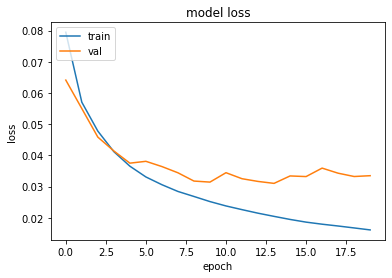

In [11]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
###Generate virtual training data 
##assign variables for crack coordinates, angle, stress intensity factors and T stress
x0_all,y0_all,b0_all,K_1_all,K_2_all,T_all=([] for i in range(6))

##Number of points and their range
#Parameters in sequence:Stress Intensity Factor I, II, T-stress,angle & Coordinates of crack(y&x)
#Number of points considered in each parameter = num_points
num_points=2
##Ranges for data parameters: 
#K_I=-300 to 1200; K_II=-110 to 130; T-stress=-60 to 22; angle=0 to 90; x_coordinate=-35 to 35; y_coordinate
K_I_range =np.linspace(-400,1300,num_points)
K_II_range=np.linspace(-140,150,num_points)
T_range =np.linspace(-70,30,num_points)
Beta_range =np.linspace(-15,6,num_points)
Y_coord_range =np.linspace(-35,-6,num_points)
X_coord_range =np.linspace(-35,-6,num_points)

#Looping over to create data
for a in K_I_range:
    for b in K_II_range:
        for c in T_range:
            for angle in Beta_range:    
                for j in Y_coord_range:    
                    for i in X_coord_range:
                        x0_all.append(i)        
                        y0_all.append(j)
                        b0_all.append(angle)
                        K_1_all.append(a)
                        K_2_all.append(b)
                        T_all.append(c)
                      
#y_data = np.column_stack((x0_all, y0_all, b0_all))

#print (x0_all)
#print (y0_all)
#print (b0_all)
print (len(x0_all))

##Obtaing strain field for varying x_0 and y_0 generated above
count_2 = 0
for count_1 in range(0,len(x0_all)):
	#from the local cordinate system and beta, let's obtain global coordinate system
    x_0=x0_all[count_1]
    y_0=y0_all[count_1]
    beta = b0_all[count_1]
    #Values of stress intensity factors extracted from the research journals Table 5: pure mode_I loading with different crack position

    SIF_1=K_1_all[count_1]
    SIF_2=K_2_all[count_1]
    T=T_all[count_1]

    
    
    hor_arr=4 #Horizontal arrangement of sensors
    ver_arr=4 #vertical arrangement of sensors
    num_sensors=hor_arr*ver_arr #number of sensors are regular rectangular arrangement 
    x_dash = np.zeros(num_sensors)
    y_dash = np.zeros(num_sensors)

    x = np.zeros(num_sensors)
    y = np.zeros(num_sensors)
    phi = np.zeros(num_sensors)
    x_count = 0
    y_count = 0
    x_dist=10 #distance between sensors
    y_dist=10    


    #below is the snip for x_dash, y_dash coordinates w.r.t film C.S.
    #np.add(y_dash,y_dist) 
    count = 0
    for k in range(1,ver_arr+1):
        for l in range(1,hor_arr+1):
            x_dash[count]= 0+x_dist*l
            y_dash[count]= 0+y_dist*k
            count  = count+1   

    #obtaining global coordinate values
    for i in range(0,num_sensors):
        x[i] = x_dash[i]*np.cos(beta)-y_dash[i]*np.sin(beta)+x_0
        y[i] = y_dash[i]*np.sin(beta)+y_dash[i]*np.cos(beta)+y_0 


    
    #coordinates of the measuring points (r,phi)
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)

    #Values of stress intensity factors extracted from the research journals Table 5: pure mode_I loading with different crack position
    nu = 0.33
    E = 72

    #with warnings.catch_warnings():
        #warnings.filterwarnings('error')
        
        
    np.seterr(divide='raise')
    try:
        stress_11 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.cos(phi/2)) * (1-np.sin(phi/2)*np.sin((3*phi)/2))) - ((SIF_2/(np.sqrt(2*np.pi*r))) * np.sin(phi/2) * (2+np.cos(phi/2)*np.cos(3*phi/2))) + T
        stress_22 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.cos(phi/2)) * (1+np.sin(phi/2)*np.sin((3*phi)/2))) + ((SIF_2/(np.sqrt(2*np.pi*r))) * np.sin(phi/2) * (np.cos(phi/2) * np.cos(3*phi/2)))
        stress_12 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.sin(phi/2)) * (np.cos(phi/2) * np.cos((3*phi)/2))) + ((SIF_2/(np.sqrt(2*np.pi*r))) * np.cos(phi/2) * (1-(np.sin(phi/2)*np.sin(3*phi/2))))
        print("stress completed")

    except FloatingPointError:
        #print(count_1)
        continue
    
        
    
    #strains of the specimen
    eps_specimen_11 = (stress_11-(nu*stress_22))/E
    eps_specimen_22 = (stress_22-(nu*stress_11))/E
    eps_specimen_12 = (1+nu)*stress_12/E
    print("strain_completed")

    #combining all the individual arrays for the sensors placed and forming a single array 
    stack_arr = np.column_stack((eps_specimen_11,eps_specimen_22,eps_specimen_12))
    xgroup = stack_arr.flatten()
    ygroup = np.column_stack((x_0,y_0,np.cos(beta),np.sin(beta),SIF_1,SIF_2,T))


    if (count_2 == 0):
        final_xgroup = xgroup
        final_ygroup = ygroup
        count_2 = 1
    else:
        final_xgroup = np.vstack((final_xgroup, xgroup))
        final_ygroup = np.vstack((final_ygroup, ygroup))
        
x_add_data = final_xgroup
y_add_data = final_ygroup

print (np.shape(x_add_data),"shape of x_data") #16 sensors and 5 outputs for each sensor, so 80
print(np.shape(y_add_data),"shape of y_data") # crack location(x and y) and angle(so 3 columns)

#print (np.shape(x_data))
#print(np.shape(y_data))    

#print (x_data[:,:4])
#print (y_data)




64
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress completed
strain_completed
stress comp

In [18]:
scaler_x.fit(x_add_data)
x_add_scale=scaler_x.transform(x_add_data)

scaler_y.fit(y_add_data)
y_add_scale=scaler_y.transform(y_add_data)

scores = model.evaluate(x_add_scale, y_add_scale, verbose=1)


2/2 [==============================] - 0s 4ms/step - loss: 0.2777


In [20]:
##TRYING LEVELS OF LOADING OUTSIDE THE TRAINING REGION



###Generate virtual training data 
##assign variables for crack coordinates, angle, stress intensity factors and T stress
x0_all,y0_all,b0_all,K_1_all,K_2_all,T_all=([] for i in range(6))

##Number of points and their range
#Parameters in sequence:Stress Intensity Factor I, II, T-stress,angle & Coordinates of crack(y&x)
#Number of points considered in each parameter = num_points
num_points=2
##Ranges for data parameters: 
#K_I=-300 to 1200; K_II=-110 to 130; T-stress=-60 to 22; angle=0 to 90; x_coordinate=-35 to 35; y_coordinate
K_I_range =np.linspace(-600,1600,num_points)
K_II_range=np.linspace(-200,200,num_points)
T_range =np.linspace(-100,50,num_points)
Beta_range =np.linspace(-15,6,num_points)
Y_coord_range =np.linspace(-35,-6,num_points)
X_coord_range =np.linspace(-35,-6,num_points)

#Looping over to create data
for a in K_I_range:
    for b in K_II_range:
        for c in T_range:
            for angle in Beta_range:    
                for j in Y_coord_range:    
                    for i in X_coord_range:
                        x0_all.append(i)        
                        y0_all.append(j)
                        b0_all.append(angle)
                        K_1_all.append(a)
                        K_2_all.append(b)
                        T_all.append(c)
                      
#y_data = np.column_stack((x0_all, y0_all, b0_all))

#print (x0_all)
#print (y0_all)
#print (b0_all)
print (len(x0_all))

##Obtaing strain field for varying x_0 and y_0 generated above
count_2 = 0
for count_1 in range(0,len(x0_all)):
	#from the local cordinate system and beta, let's obtain global coordinate system
    x_0=x0_all[count_1]
    y_0=y0_all[count_1]
    beta = b0_all[count_1]
    #Values of stress intensity factors extracted from the research journals Table 5: pure mode_I loading with different crack position

    SIF_1=K_1_all[count_1]
    SIF_2=K_2_all[count_1]
    T=T_all[count_1]

    
    
    hor_arr=4 #Horizontal arrangement of sensors
    ver_arr=4 #vertical arrangement of sensors
    num_sensors=hor_arr*ver_arr #number of sensors are regular rectangular arrangement 
    x_dash = np.zeros(num_sensors)
    y_dash = np.zeros(num_sensors)

    x = np.zeros(num_sensors)
    y = np.zeros(num_sensors)
    phi = np.zeros(num_sensors)
    x_count = 0
    y_count = 0
    x_dist=10 #distance between sensors
    y_dist=10    


    #below is the snip for x_dash, y_dash coordinates w.r.t film C.S.
    #np.add(y_dash,y_dist) 
    count = 0
    for k in range(1,ver_arr+1):
        for l in range(1,hor_arr+1):
            x_dash[count]= 0+x_dist*l
            y_dash[count]= 0+y_dist*k
            count  = count+1   

    #obtaining global coordinate values
    for i in range(0,num_sensors):
        x[i] = x_dash[i]*np.cos(beta)-y_dash[i]*np.sin(beta)+x_0
        y[i] = y_dash[i]*np.sin(beta)+y_dash[i]*np.cos(beta)+y_0 


    
    #coordinates of the measuring points (r,phi)
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)

    #Values of stress intensity factors extracted from the research journals Table 5: pure mode_I loading with different crack position
    nu = 0.33
    E = 72

    #with warnings.catch_warnings():
        #warnings.filterwarnings('error')
        
        
    np.seterr(divide='raise')
    try:
        stress_11 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.cos(phi/2)) * (1-np.sin(phi/2)*np.sin((3*phi)/2))) - ((SIF_2/(np.sqrt(2*np.pi*r))) * np.sin(phi/2) * (2+np.cos(phi/2)*np.cos(3*phi/2))) + T
        stress_22 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.cos(phi/2)) * (1+np.sin(phi/2)*np.sin((3*phi)/2))) + ((SIF_2/(np.sqrt(2*np.pi*r))) * np.sin(phi/2) * (np.cos(phi/2) * np.cos(3*phi/2)))
        stress_12 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.sin(phi/2)) * (np.cos(phi/2) * np.cos((3*phi)/2))) + ((SIF_2/(np.sqrt(2*np.pi*r))) * np.cos(phi/2) * (1-(np.sin(phi/2)*np.sin(3*phi/2))))
  

    except FloatingPointError:
        #print(count_1)
        continue
    
        
    
    #strains of the specimen
    eps_specimen_11 = (stress_11-(nu*stress_22))/E
    eps_specimen_22 = (stress_22-(nu*stress_11))/E
    eps_specimen_12 = (1+nu)*stress_12/E


    #combining all the individual arrays for the sensors placed and forming a single array 
    stack_arr = np.column_stack((eps_specimen_11,eps_specimen_22,eps_specimen_12))
    xgroup = stack_arr.flatten()
    ygroup = np.column_stack((x_0,y_0,np.cos(beta),np.sin(beta),SIF_1,SIF_2,T))


    if (count_2 == 0):
        final_xgroup = xgroup
        final_ygroup = ygroup
        count_2 = 1
    else:
        final_xgroup = np.vstack((final_xgroup, xgroup))
        final_ygroup = np.vstack((final_ygroup, ygroup))
        
x_add_data_2 = final_xgroup
y_add_data_2 = final_ygroup

print (np.shape(x_add_data_2),"shape of x_data") #16 sensors and 5 outputs for each sensor, so 80
print(np.shape(y_add_data_2),"shape of y_data") # crack location(x and y) and angle(so 3 columns)

#print (np.shape(x_data))
#print(np.shape(y_data))    

#print (x_data[:,:4])
#print (y_data)




64
(64, 48) shape of x_data
(64, 7) shape of y_data


In [22]:
scaler_x.fit(x_add_data_2)
x_add_scale_2=scaler_x.transform(x_add_data_2)

scaler_y.fit(y_add_data_2)
y_add_scale_2=scaler_y.transform(y_add_data_2)

scores = model.evaluate(x_add_scale_2, y_add_scale_2, verbose=1)


2/2 [==============================] - 0s 3ms/step - loss: 0.2960
